# MNIST Classification - Five Layer NN

In [20]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [21]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [22]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.ones([200])/10)
b2 = tf.Variable(tf.ones([100])/10)
b3 = tf.Variable(tf.ones([60])/10)
b4 = tf.Variable(tf.ones([30])/10)
b5 = tf.Variable(tf.ones([10])/10)

In [23]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [24]:
# The model
Y1 = tf.nn.relu(tf.matmul(XX, W1) + b1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
Z = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Z)

In [25]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [26]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
# to keep track of max accuracy
max_accuracy = 0.0

In [28]:
train_step = tf.train.AdamOptimizer(0.003).minimize(cross_entropy)

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [30]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [31]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.11 loss: 230.03162
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0865 test loss: 230.55315
10: accuracy:0.53 loss: 145.26956
20: accuracy:0.75 loss: 87.923294
30: accuracy:0.8 loss: 66.78097
40: accuracy:0.84 loss: 51.94828
50: accuracy:0.88 loss: 43.808075
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8856 test loss: 40.015835
60: accuracy:0.9 loss: 34.331467
70: accuracy:0.88 loss: 34.721905
80: accuracy:0.91 loss: 34.80722
90: accuracy:0.9 loss: 33.133865
100: accuracy:0.99 loss: 11.732085
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9213 test loss: 28.030703
110: accuracy:0.86 loss: 45.301582
120: accuracy:0.86 loss: 47.881516
130: accuracy:0.96 loss: 16.43459
140: accuracy:0.96 loss: 21.749535
150: accuracy:0.93 loss: 19.698385
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9183 test loss: 26.36386
160: accuracy:0.94 loss: 19.728401
170: accuracy:0.88 loss: 29.120564
180: accuracy:0.9 loss: 40.86673
190: accuracy:0.9 loss: 30.414587
200: accuracy:0.91 loss: 33.049652
20

1710: accuracy:0.97 loss: 7.839624
1720: accuracy:0.96 loss: 7.484924
1730: accuracy:0.98 loss: 6.0785666
1740: accuracy:0.94 loss: 16.25582
1750: accuracy:0.97 loss: 7.470943
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9694 test loss: 10.400341
1760: accuracy:0.96 loss: 7.752699
1770: accuracy:0.95 loss: 10.334173
1780: accuracy:0.95 loss: 13.280803
1790: accuracy:0.97 loss: 13.913248
1800: accuracy:0.99 loss: 3.6269736
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.972 test loss: 8.941671
1810: accuracy:0.98 loss: 3.7207637
1820: accuracy:0.99 loss: 1.4003997
1830: accuracy:1.0 loss: 1.1288452
1840: accuracy:0.98 loss: 2.4797041
1850: accuracy:0.98 loss: 3.6969993
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9754 test loss: 8.459363
1860: accuracy:0.99 loss: 4.2257776
1870: accuracy:0.99 loss: 2.8369703
1880: accuracy:0.96 loss: 8.0947895
1890: accuracy:0.99 loss: 8.6291275
1900: accuracy:0.98 loss: 6.689523
1900: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9717 test loss: 10.39035

3380: accuracy:0.99 loss: 5.826163
3390: accuracy:0.97 loss: 8.821605
3400: accuracy:0.95 loss: 10.814534
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9753 test loss: 8.80538
3410: accuracy:0.98 loss: 9.297127
3420: accuracy:0.99 loss: 2.3318985
3430: accuracy:0.98 loss: 4.5161805
3440: accuracy:0.99 loss: 1.7897066
3450: accuracy:1.0 loss: 0.73851746
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9777 test loss: 7.882453
3460: accuracy:0.99 loss: 5.660606
3470: accuracy:1.0 loss: 0.80421895
3480: accuracy:0.98 loss: 7.683886
3490: accuracy:0.97 loss: 4.662051
3500: accuracy:1.0 loss: 0.64782286
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.975 test loss: 10.105567
3510: accuracy:0.97 loss: 8.483677
3520: accuracy:1.0 loss: 0.35668144
3530: accuracy:1.0 loss: 1.7535429
3540: accuracy:1.0 loss: 0.8219835
3550: accuracy:1.0 loss: 1.2778085
3550: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9726 test loss: 9.477556
3560: accuracy:0.98 loss: 6.720469
3570: accuracy:1.0 loss: 0.27317584
3580

5040: accuracy:0.99 loss: 3.0690272
5050: accuracy:0.99 loss: 2.6277704
5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9796 test loss: 8.7342005
5060: accuracy:0.99 loss: 3.110399
5070: accuracy:0.98 loss: 6.936868
5080: accuracy:0.98 loss: 9.880857
5090: accuracy:0.99 loss: 1.5656788
5100: accuracy:1.0 loss: 0.512315
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9782 test loss: 7.94152
5110: accuracy:0.99 loss: 3.423538
5120: accuracy:1.0 loss: 0.8158613
5130: accuracy:0.99 loss: 2.0779831
5140: accuracy:0.99 loss: 6.501456
5150: accuracy:1.0 loss: 0.75038964
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9789 test loss: 8.95362
5160: accuracy:0.99 loss: 7.653099
5170: accuracy:0.98 loss: 5.584472
5180: accuracy:0.99 loss: 1.0061225
5190: accuracy:0.97 loss: 7.3625846
5200: accuracy:1.0 loss: 0.7073867
5200: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9775 test loss: 9.524117
5210: accuracy:0.99 loss: 2.090539
5220: accuracy:1.0 loss: 1.1430824
5230: accuracy:1.0 loss: 1.6115464
5240: a

6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9807 test loss: 10.107842
6710: accuracy:1.0 loss: 0.050313544
6720: accuracy:1.0 loss: 0.026782246
6730: accuracy:0.99 loss: 2.2255015
6740: accuracy:0.99 loss: 3.32897
6750: accuracy:1.0 loss: 0.6554198
6750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9794 test loss: 10.409085
6760: accuracy:0.99 loss: 2.6324484
6770: accuracy:0.99 loss: 0.9689358
6780: accuracy:0.99 loss: 1.6063653
6790: accuracy:0.99 loss: 3.4439876
6800: accuracy:0.99 loss: 2.2258627
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.981 test loss: 9.232416
6810: accuracy:1.0 loss: 0.20232333
6820: accuracy:0.98 loss: 9.077954
6830: accuracy:1.0 loss: 0.15170091
6840: accuracy:0.99 loss: 1.5706865
6850: accuracy:1.0 loss: 1.3504101
6850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9763 test loss: 9.331473
6860: accuracy:1.0 loss: 0.1578116
6870: accuracy:1.0 loss: 1.4055991
6880: accuracy:1.0 loss: 0.46712527
6890: accuracy:1.0 loss: 1.419308
6900: accuracy:1.0 loss: 0.2416253

8340: accuracy:0.97 loss: 11.837314
8350: accuracy:0.99 loss: 4.8809085
8350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9782 test loss: 9.067119
8360: accuracy:0.99 loss: 1.8190446
8370: accuracy:0.99 loss: 2.201322
8380: accuracy:0.99 loss: 1.277754
8390: accuracy:0.99 loss: 1.8107865
8400: accuracy:0.99 loss: 1.1623013
8400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.98 test loss: 9.233768
8410: accuracy:0.99 loss: 1.4212637
8420: accuracy:0.98 loss: 9.909768
8430: accuracy:1.0 loss: 0.17168945
8440: accuracy:0.98 loss: 2.947411
8450: accuracy:1.0 loss: 0.12269426
8450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9803 test loss: 9.803899
8460: accuracy:0.98 loss: 6.192025
8470: accuracy:0.99 loss: 7.296911
8480: accuracy:1.0 loss: 0.55272925
8490: accuracy:1.0 loss: 0.078543775
8500: accuracy:1.0 loss: 0.29625088
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9774 test loss: 10.875262
8510: accuracy:1.0 loss: 0.026577117
8520: accuracy:1.0 loss: 0.04447958
8530: accuracy:1.0 loss: 0.103321

9970: accuracy:0.96 loss: 8.420687
9980: accuracy:1.0 loss: 0.12736322
9990: accuracy:1.0 loss: 0.023139725
10000: accuracy:1.0 loss: 0.1879934
10000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9794 test loss: 10.511571


In [32]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9816


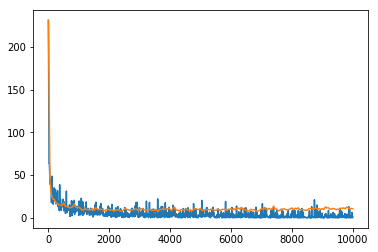

In [18]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
plt.ylim(top=30, bottom=0)
plt.show()

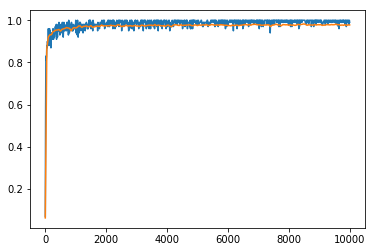

In [19]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
#plt.ylim(top = 1, bottom=.9)
plt.show()